<a href="https://colab.research.google.com/github/Mina0402/EU_M_Math-Repository/blob/main/Chap09_Ex_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn
%precision 3

'%.3f'

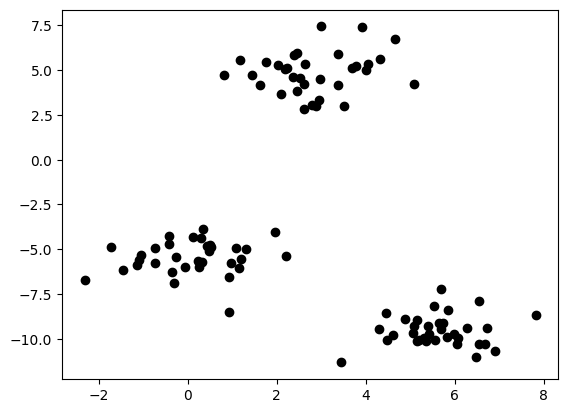

In [2]:
#k-means法でのクラスタリング
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#make_blobsは2つの値を返すため、一方は使用しない「_」で受け取る
X,_=make_blobs(random_state=10)

plt.scatter(X[:,0],X[:,1],color='black')

In [3]:
kmeans=KMeans(init='random', n_clusters=3)

#クラスターの重心の計算
kmeans.fit(X)

#クラスター番号の予測
y_pred=kmeans.predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


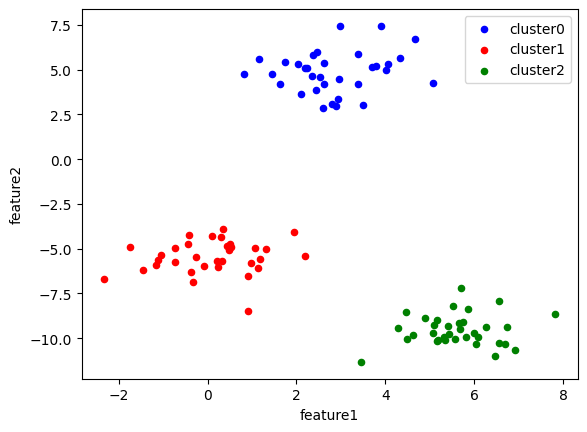

In [4]:
merge_data=pd.concat([DataFrame(X[:,0]),DataFrame(X[:,1]),pd.DataFrame(y_pred)],axis=1)
merge_data.columns=['feature1','feature2','cluster']

ax=None
colors=['blue','red','green']
for i, data in merge_data.groupby('cluster'):
    ax=data.plot.scatter(x='feature1', y='feature2', color=colors[i],
    label=f'cluster{i}',ax=ax)

In [5]:
#金融マーケティングデータをクラスタリング
import requests,zipfile
import io

zip_file_url='https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

r=requests.get(zip_file_url, stream=True)
z=zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()



In [6]:
bank=pd.read_csv('bank-full.csv',sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
print('データ形式(X,y):{}'.format(bank.shape))
print('欠損データの数:{}'.format(bank.isnull().sum().sum()))

データ形式(X,y):(45211, 17)
欠損データの数:0


In [8]:
from sklearn.preprocessing import StandardScaler

bank_sub=bank[['age','balance','campaign','previous']]

sc=StandardScaler()
sc.fit(bank_sub)
bank_sub_std=sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster_number
4    14734
0    24509
2     2684
1      221
5     1683
3     1380
Name: count, dtype: int64


Text(0, 0.5, 'count')

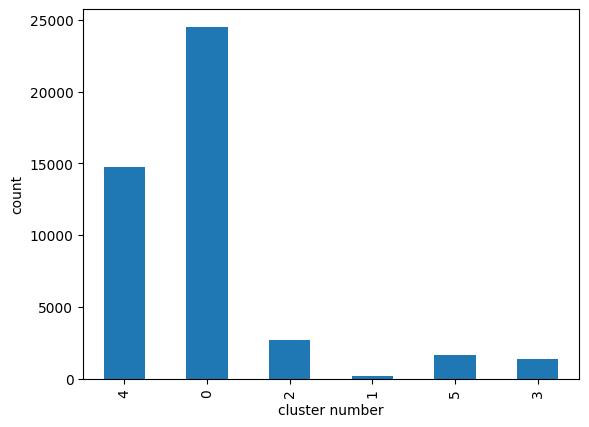

In [9]:
kmeans=KMeans(init='random',n_clusters=6, random_state=0)

kmeans.fit(bank_sub_std)

labels=pd.Series(kmeans.labels_,name='cluster_number')

print(labels.value_counts(sort=False))

ax=labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Distortion')

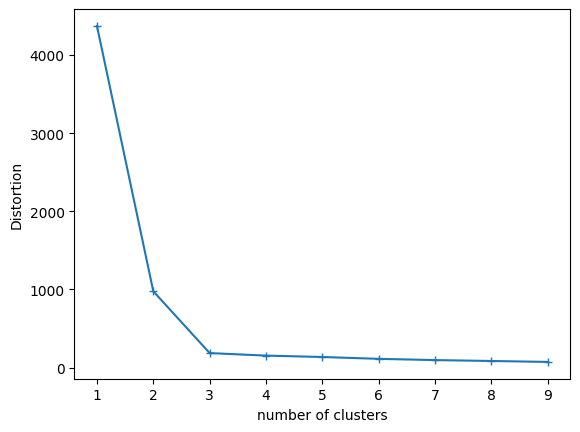

In [10]:
#エルボー法によるクラスター数の推定
dist_list=[]
for i in range(1,10):
    kmeans=KMeans(init='random',n_clusters=i,random_state=0)
    kmeans.fit(X)
    dist_list.append(kmeans.inertia_)

plt.plot(range(1,10),dist_list,marker='+')
plt.xlabel('number of clusters')
plt.ylabel('Distortion')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Distortion')

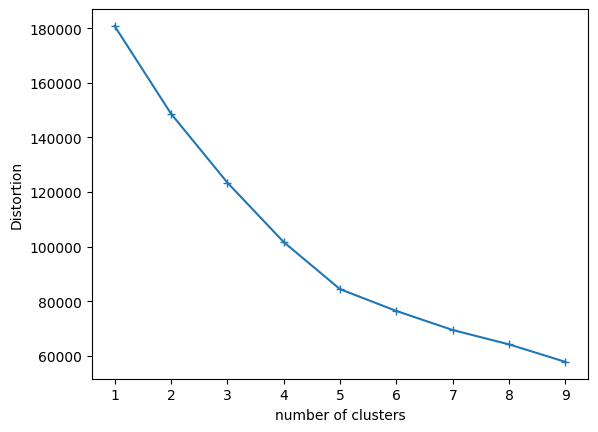

In [11]:
dist_list=[]
for i in range(1,10):
    kmeans=KMeans(init='random',n_clusters=i,random_state=0)
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)


plt.plot(range(1,10),dist_list,marker='+')
plt.xlabel('number of clusters')
plt.ylabel('Distortion')

In [12]:
bank_with_cluster=pd.concat([bank,labels],axis=1)
bank_with_cluster.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,4
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [13]:
bins=[15,20,25,30,35,40,45,50,55,60,65,100]

qcut_age=pd.cut(bank_with_cluster.age, bins, right=False)

df=pd.concat([bank_with_cluster.cluster_number,qcut_age],axis=1)

cross_cluster_age=df.groupby(['cluster_number','age']).size().unstack().fillna(0)
cross_cluster_age

age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cluster_number,,,,,,,,,,,
0,45,711,4024,8492,7146,4091,0,0,0,0,0
1,0,3,10,37,25,26,27,30,38,11,14
2,0,14,152,497,517,460,375,306,263,63,37
3,0,20,132,327,308,187,146,117,71,38,34
4,0,0,0,0,0,1155,4701,3885,3436,838,719
5,2,14,146,387,353,266,221,150,114,24,6


In [14]:
hist_age=pd.value_counts(qcut_age)
hist_age

age
[30, 35)     9740
[35, 40)     8349
[40, 45)     6185
[45, 50)     5470
[50, 55)     4488
[25, 30)     4464
[55, 60)     3922
[60, 65)      974
[65, 100)     810
[20, 25)      762
[15, 20)       47
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='cluster_number'>

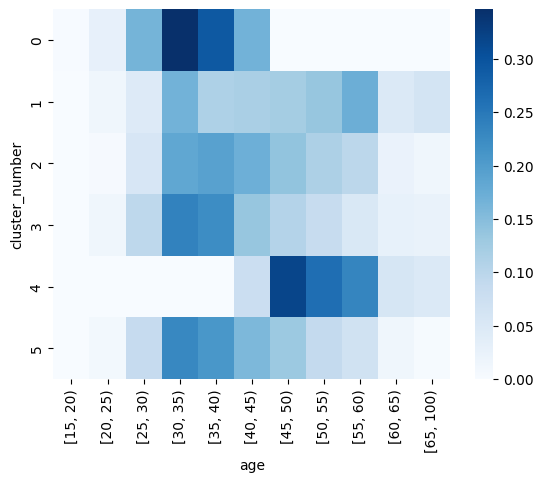

In [15]:
sns.heatmap(cross_cluster_age.apply(lambda x:x/x.sum(),axis=1),cmap='Blues')

In [16]:
cross_cluter_job=bank_with_cluster.groupby(['cluster_number','job']).size().unstack().fillna(0)
cross_cluter_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
cluster_number,,,,,,,,,,,,
0,3097,5610,728,426,5130,57,852,2564,813,4459,698,75
1,15,12,19,7,91,24,11,9,3,21,6,3
2,219,459,91,70,788,111,130,189,48,460,99,20
3,196,244,42,22,332,53,41,112,52,250,31,5
4,1467,3040,543,675,2732,1984,479,1124,4,2084,439,163
5,177,367,64,40,385,35,66,156,18,323,30,22


<Axes: xlabel='job', ylabel='cluster_number'>

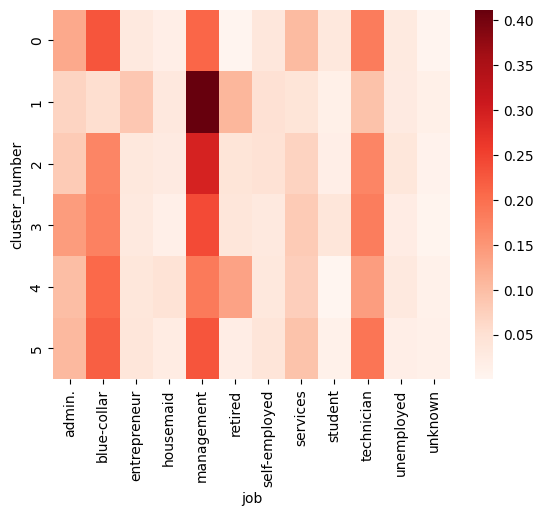

In [17]:
sns.heatmap(cross_cluter_job.apply(lambda x:x/x.sum(),axis=1),cmap='Reds')

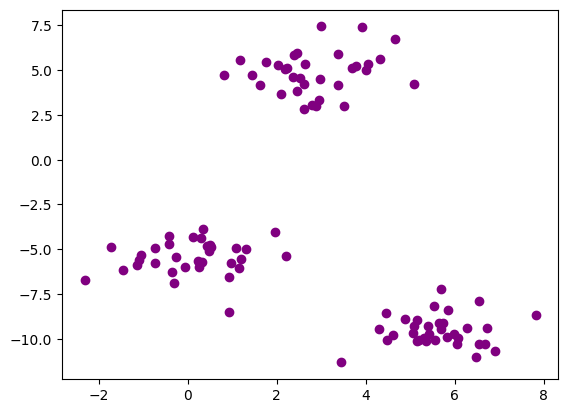

In [18]:
#練習問題9-1

X1,_=make_blobs(random_state=52)

plt.scatter(X[:,0],X[:,1],color='purple')

In [19]:
kmeans1=KMeans(init='random', n_clusters=3)

kmeans1.fit(X1)

y_pred1=kmeans1.predict(X1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


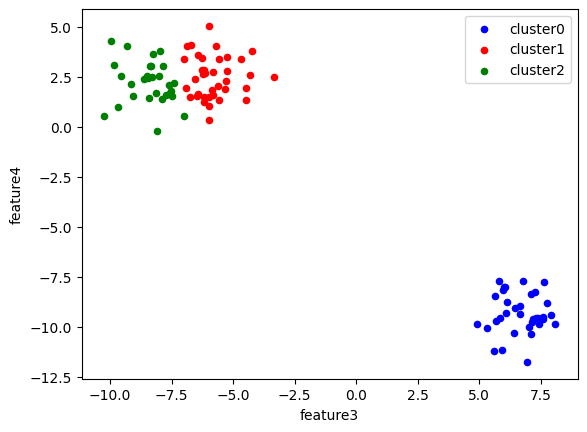

In [20]:
merge_data=pd.concat([DataFrame(X1[:,0]),DataFrame(X1[:,1]),pd.DataFrame(y_pred1)],axis=1)
merge_data.columns=['feature3','feature4','cluster']

ax=None
colors=['blue','red','green']
for i, data in merge_data.groupby('cluster'):
    ax=data.plot.scatter(x='feature3', y='feature4', color=colors[i],
    label=f'cluster{i}',ax=ax)

相関係数0.889:


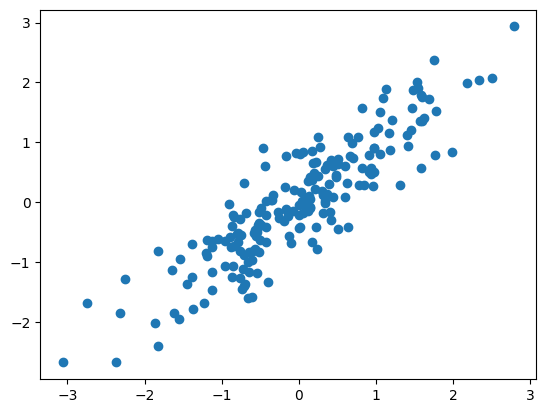

In [21]:
#主成分分析
from sklearn.preprocessing import StandardScaler

sample=np.random.RandomState(1)

X2=np.dot(sample.rand(2,2),sample.randn(2,200)).T

sc=StandardScaler()
X2_std=sc.fit_transform(X2)

print('相関係数{:.3f}:'.format(sp.stats.pearsonr(X2_std[:,0],X2_std[:,1])[0]))
plt.scatter(X2_std[:,0],X2_std[:,1])

In [22]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(X2_std)

PCA(n_components=2)

In [23]:
components = pca.components_


In [24]:
print(components)

[[-0.707 -0.707]
 [-0.707  0.707]]


In [25]:
print('各主成分の分散:{}'.format(pca.explained_variance_))

各主成分の分散:[1.899 0.111]


In [26]:
print('各主成分の分散割合:{}'.format(pca.explained_variance_ratio_))

各主成分の分散割合:[0.945 0.055]


(-3.3534087054527717,
 3.079070151762556,
 -2.9610077757452697,
 3.2159825436132246)

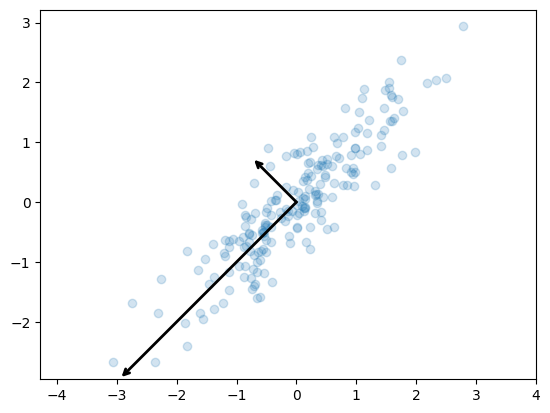

In [27]:
arrowprops=dict(arrowstyle='->',
                linewidth=2,
                shrinkA=0,shrinkB=0)

def draw_vector(v0,v1):
    plt.gca().annotate('',v1,v0,arrowprops=arrowprops)

plt.scatter(X2_std[:,0],X2_std[:,1],alpha=0.2)

for length, vector in zip(pca.explained_variance_,pca.components_):
    v=vector*3*np.sqrt(length)
    draw_vector(pca.mean_,pca.mean_+v)

plt.axis('equal')

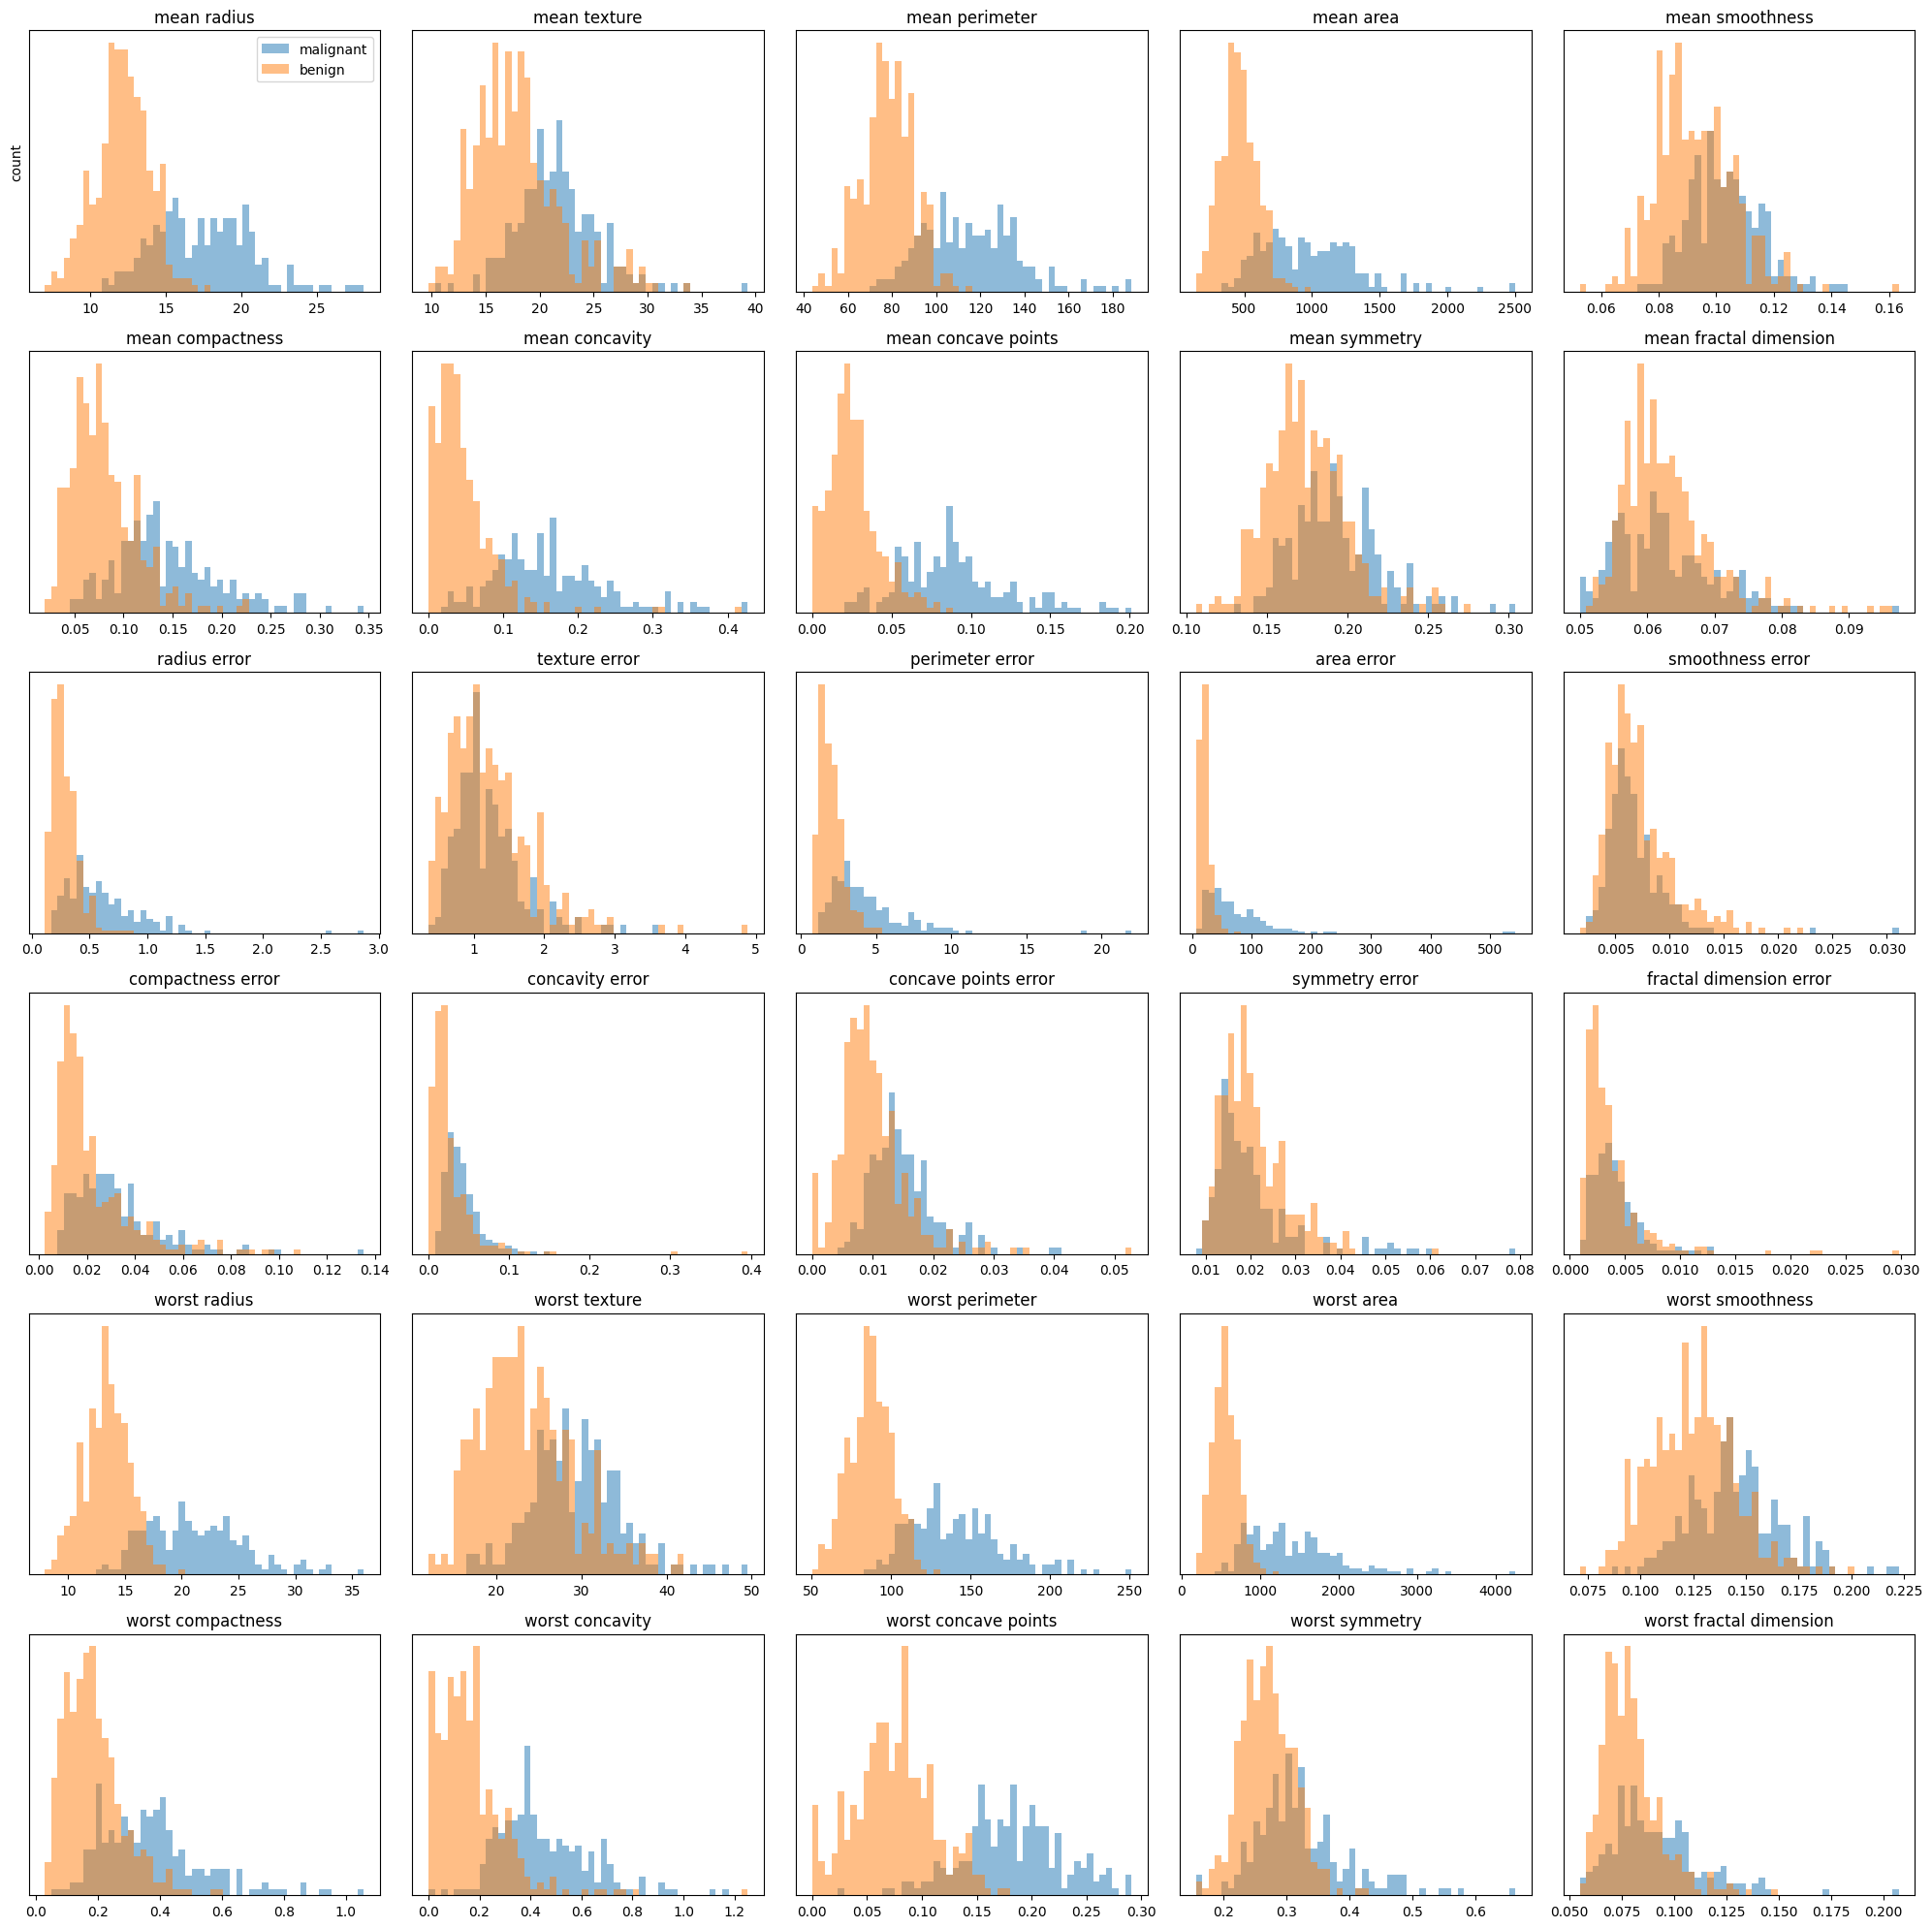

In [29]:
#主成分分析の実例
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()

malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]

fig,axes=plt.subplots(6,5,figsize=(20,20))
ax=axes.ravel()

for i in range(30):
    _,bins=np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins,alpha=0.5)
    ax[i].hist(benign[:,i],bins=bins,alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_ylabel('count')
ax[0].legend(['malignant','benign'],loc='best')
fig.tight_layout()

In [31]:
sc=StandardScaler()
X_std=sc.fit_transform(cancer.data)

pca=PCA(n_components=2)
pca.fit(x_std)
X_pca=pca.transform(X_std)

print('X_pca shape:{}'.format(X_pca.shape))
print('Explained variance ration:{}'.format(pca.explained_variance_ratio_))

X_pca shape:(569, 2)
Explained variance ration:[0.443 0.19 ]


In [32]:
X_pca_df=pd.DataFrame(X_pca,columns=['PC1','PC2'])

X_pca=pd.concat([X_pca_df,pd.DataFrame(cancer.target, columns=['target'])],axis=1)

pca_malignant=X_pca[X_pca.target==0]
pca_benign=X_pca[X_pca.target==1]

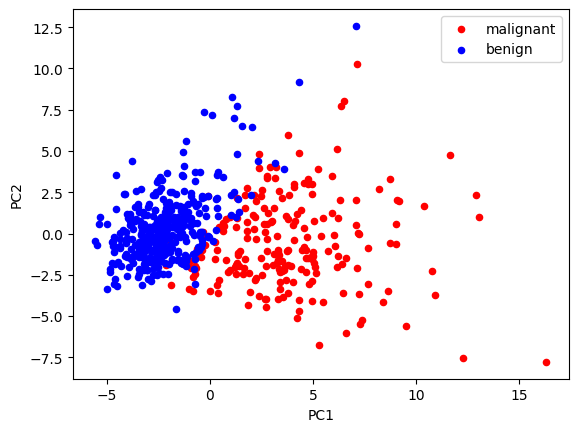

In [33]:
ax=pca_malignant.plot.scatter(x='PC1',y='PC2',color='red',label='malignant')

pca_benign.plot.scatter(x='PC1',y='PC2',color='blue',label='benign',ax=ax)

plt.legend()

In [42]:
#連取問題9-2
from sklearn.datasets import load_iris

iris=load_iris()

sc=StandardScaler()
X_std=sc.fit_transform(iris.data)

pca=PCA(n_components=2)
pca.fit(X_std)
X_pca=pca.transform(X_std)

print('X_pca shape:{}'.format(X_pca.shape))
print('Explained variance ration:{}'.format(pca.explained_variance_ratio_))

X_pca shape:(150, 2)
Explained variance ration:[0.73  0.229]


In [44]:
X_pca=pd.DataFrame(X_pca,columns=['PC1','PC2'])
X_pca=pd.concat([X_pca_df,pd.DataFrame(iris.target, columns=['target'])],axis=1)

pca_0=X_pca[X_pca.target==0]
pca_1=X_pca[X_pca.target==1]

<Axes: xlabel='PC1', ylabel='PC2'>

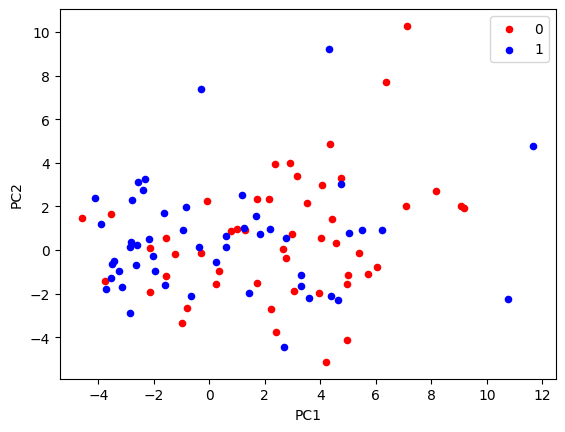

In [45]:
ax=pca_0.plot.scatter(x='PC1',y='PC2',color='red',label='0')

pca_1.plot.scatter(x='PC1',y='PC2',color='blue',label='1',ax=ax)